In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

In [18]:
import scipy.io.arff as arff

In [5]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['axes.grid'] = False

In [19]:
trainset_file = '/content/ECG5000_TRAIN.arff'
testset_file = '/content/ECG5000_TEST.arff'

traindata, trainmeta = arff.loadarff(trainset_file)
testdata, testmeta = arff.loadarff(testset_file)
train = pd.DataFrame(traindata, columns=trainmeta.names())
test = pd.DataFrame(testdata, columns=testmeta.names())
df = pd.concat([train, test])

print(train.shape)
print(test.shape)
print(df.shape)

(500, 141)
(4500, 141)
(5000, 141)


In [24]:
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att131,att132,att133,att134,att135,att136,att137,att138,att139,att140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,-1.362068,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,-0.910487,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,-0.476660,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [27]:
df.head(5)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,b'1'
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,b'1'
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,b'1'
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,b'1'
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,b'1'


,count
target,
b'1',2919
b'2',1767
b'4',194
b'3',96
b'5',24


In [31]:
value_map = {
    b'1': 1.0,
    b'2': 2.0,
    b'3':3.0,
    b'4':4.0,
    b'5':5.0
}

df['target'] = df['target'].replace(value_map)

In [32]:
df['target'].value_counts()

,count
target,
1,2919
2,1767
4,194
3,96
5,24


In [33]:
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,...,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008,1.527400
std,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,...,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465,0.760372
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,1.000000
25%,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,-1.362068,...,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692,1.000000
50%,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,-0.910487,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588,1.000000
75%,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,-0.476660,...,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012,2.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,5.000000


In [34]:
from sklearn.model_selection import train_test_split

In [36]:
train_data,test_data,train_labels,test_labels=train_test_split(df.values,df.values[:,-1],test_size=0.2,random_state=111)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()
data_scaled=scaler.fit(train_data)

In [41]:
train_data_scaled=data_scaled.transform(train_data)
test_data_scaled=data_scaled.transform(test_data)

In [42]:
train_data_scaled

array([[0.50002524, 0.42299659, 0.16544622, ..., 0.58388556, 0.3649298 ,
        0.        ],
       [0.48602565, 0.31200637, 0.10347709, ..., 0.6676527 , 0.40538671,
        0.        ],
       [0.6760041 , 0.6161329 , 0.32423629, ..., 0.64562905, 0.43438114,
        0.        ],
       ...,
       [0.70698484, 0.7982501 , 0.77487296, ..., 0.31421167, 0.37774737,
        0.25      ],
       [0.46498254, 0.25827775, 0.07491123, ..., 0.66453824, 0.47717869,
        0.        ],
       [0.69314707, 0.79831145, 0.82004413, ..., 0.61110713, 0.53512758,
        0.25      ]])

In [52]:
normal_train_data=pd.DataFrame(train_data_scaled).add_prefix('att').query('att140==0').values[:,0:140]
anamaly_train_data=pd.DataFrame(train_data_scaled).add_prefix('att').query('att140>0').values[:,0:140]


In [54]:
normal_test_data=pd.DataFrame(test_data_scaled).add_prefix('att').query('att140==0').values[:,0:140]
anamaly_test_data=pd.DataFrame(test_data_scaled).add_prefix('att').query('att140>0').values[:,0:140]


In [56]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [57]:
print(anamaly_train_data.shape)
print(anamaly_test_data.shape)

(1644, 140)
(437, 140)


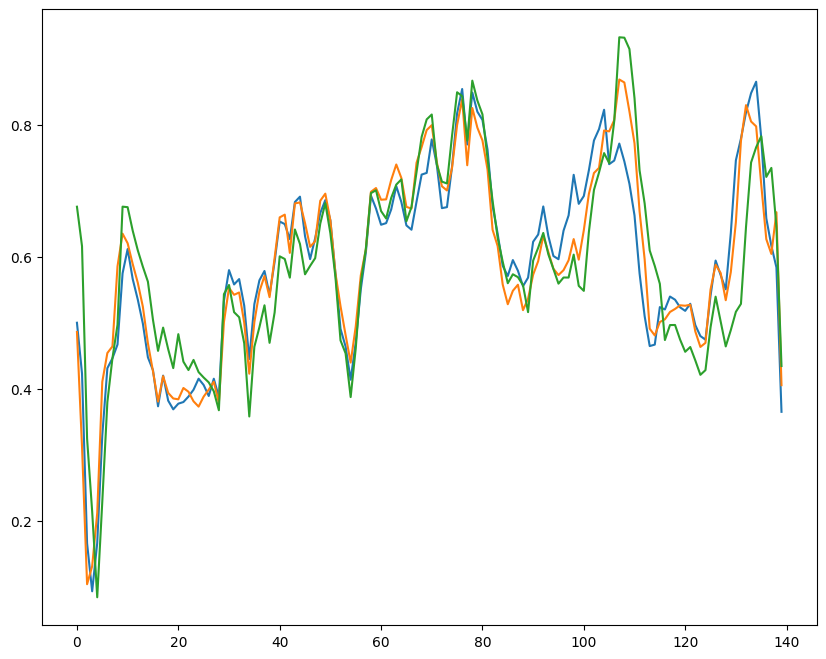

In [58]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

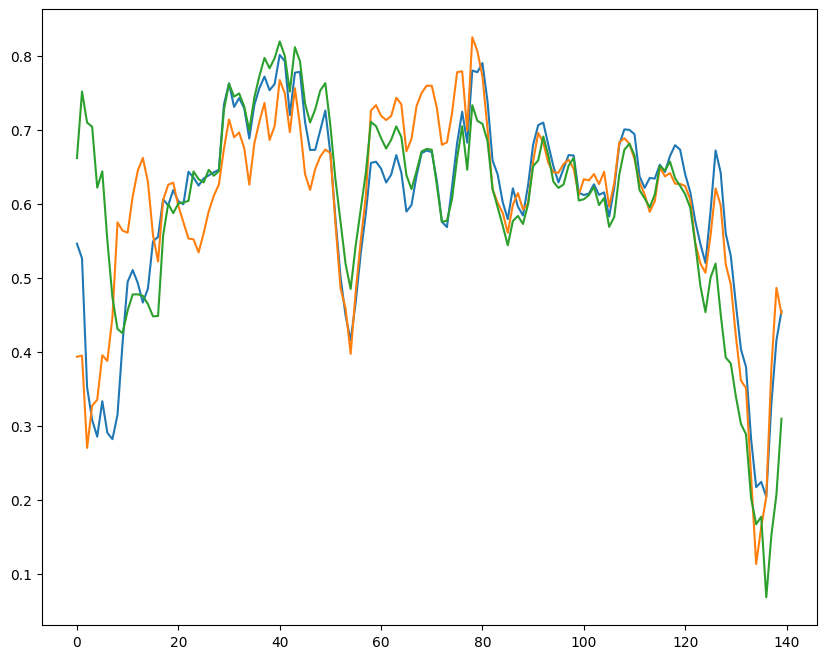

In [59]:
plt.plot(anamaly_train_data[0])
plt.plot(anamaly_train_data[1])
plt.plot(anamaly_train_data[2])

In [61]:
model=tf.keras.Sequential()
model.add(tf.keras.layers. Dense (64, activation= 'relu'))
model.add(tf.keras.layers.Dense(32, activation ='relu'))
model.add(tf.keras.layers.Dense(16, activation ='relu'))
model.add(tf.keras.layers.Dense(8, activation ='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers. Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(140, activation='sigmoid'))

In [62]:
import tensorflow as tf
from tensorflow.keras import Model

class AutoEncoder(Model):
    def __init__(self):  # Correct the method name to __init__
        super(AutoEncoder, self).__init__()

        # Define the encoder part of the autoencoder
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(8, activation="relu")
        ])

        # Define the decoder part of the autoencoder
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(140, activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [64]:
model=AutoEncoder()
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_cross",patience=2,mode="min"
                                                )
model.compile(optimizer="adam",loss="mae")

In [66]:
history=model.fit(normal_train_data,normal_train_data,epochs=50,
                  batch_size=128,
                  validation_data=(train_data_scaled[:,0:140],train_data_scaled[:,0:140]),
                  shuffle=True,callbacks=[early_stopping])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0250 - val_loss: 0.0510
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - val_loss: 0.0506
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - val_loss: 0.0504
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252 - val_loss: 0.0506
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0249 - val_loss: 0.0502
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0247 - val_loss: 0.0501
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - val_loss: 0.0499
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - val_loss: 0.0502
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0496
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - val_loss: 0.0500
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0247 - val_loss: 0.0502
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0241 - val_lo

In [68]:
encoder_out=model.encoder(normal_test_data).numpy()
decoder_out=model.decoder(encoder_out).numpy()



In [69]:
encoder_out.shape

(563, 8)

In [70]:
decoder_out.shape

(563, 140)

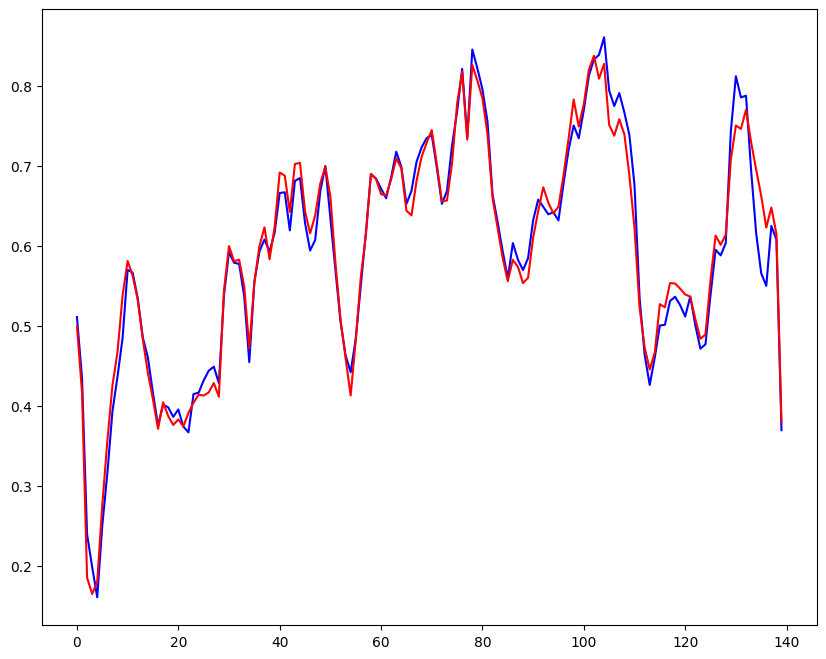

In [71]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [72]:
encoder_out=model.encoder(anamaly_test_data).numpy()
decoder_out=model.decoder(encoder_out).numpy()



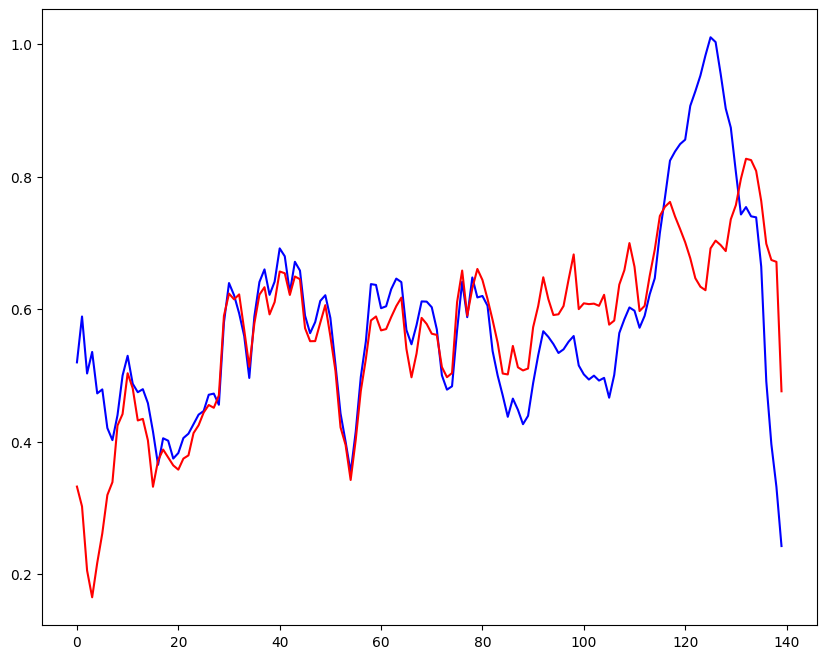

In [73]:
plt.plot(anamaly_test_data[0],'b')
plt.plot(decoder_out[0],'r')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([ 8., 21., 53., 53., 72., 56., 48., 55., 35., 30., 30., 14., 17.,
        12., 12., 10.,  7.,  8.,  2.,  0.,  1.,  5.,  1.,  0.,  2.,  1.,
         2.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0.00957728, 0.01121338, 0.01284948, 0.01448558, 0.01612167,
        0.01775777, 0.01939387, 0.02102996, 0.02266606, 0.02430216,
        0.02593825, 0.02757435, 0.02921045, 0.03084654, 0.03248264,
        0.03411874, 0.03575483, 0.03739093, 0.03902703, 0.04066312,
        0.04229922, 0.04393532, 0.04557141, 0.04720751, 0.04884361,
        0.0504797 , 0.0521158 , 0.0537519 , 0.05538799, 0.05702409,
        0.05866019, 0.06029628, 0.06193238, 0.06356848, 0.06520457,
        0.06684067, 0.06847677, 0.07011286, 0.07174896, 0.07338506,
        0.07502115, 0.07665725, 0.07829335, 0.07992944, 0.08156554,
        0.08320164, 0.08483774, 0.08647383, 0.08810993, 0.08974603,
        0.09138212]),
 <BarContainer

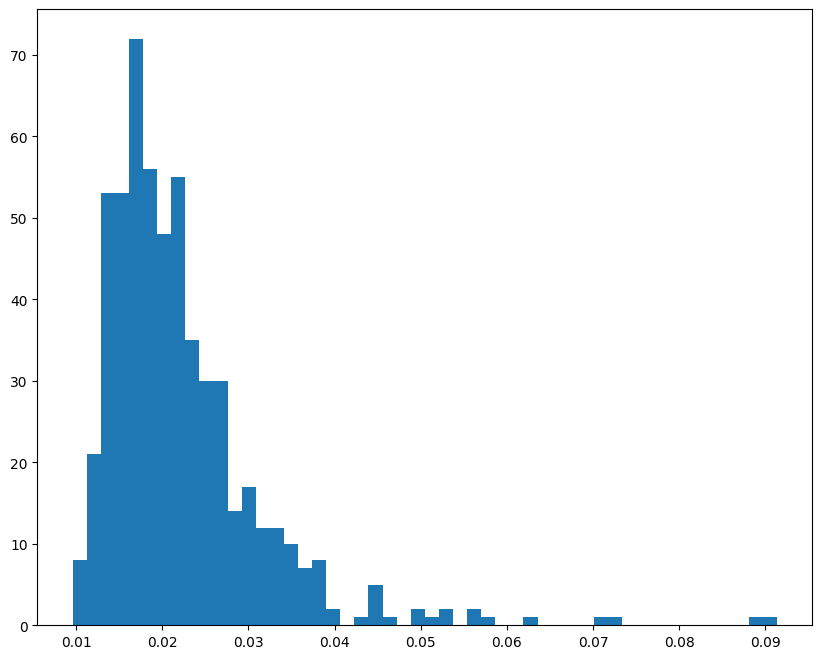

In [116]:
reconstructions=model.predict(normal_test_data)
train_loss=tf.keras.losses.mae(reconstructions,normal_test_data)
plt.hist(train_loss,bins=50)

In [117]:
np.mean(train_loss)

0.022181005139601178

In [118]:
np.std(train_loss)

0.009456798933132221

In [119]:
thresold=np.mean(train_loss)+2*np.std(train_loss)

In [120]:
thresold

0.04109460300586562

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([ 1.,  1.,  0.,  2.,  2.,  4.,  4.,  5.,  8.,  7., 15., 19., 25.,
        47., 48., 47., 47., 34., 38., 34., 18., 11.,  5.,  2.,  1.,  0.,
         0.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02916816, 0.03243192, 0.03569567, 0.03895943, 0.04222319,
        0.04548695, 0.04875071, 0.05201447, 0.05527823, 0.05854199,
        0.06180575, 0.06506951, 0.06833327, 0.07159703, 0.07486079,
        0.07812455, 0.0813883 , 0.08465206, 0.08791582, 0.09117958,
        0.09444334, 0.0977071 , 0.10097086, 0.10423462, 0.10749838,
        0.11076214, 0.1140259 , 0.11728966, 0.12055342, 0.12381718,
        0.12708094, 0.13034469, 0.13360845, 0.13687221, 0.14013597,
        0.14339973, 0.14666349, 0.14992725, 0.15319101, 0.15645477,
        0.15971853, 0.16298229, 0.16624605, 0.16950981, 0.17277357,
        0.17603733, 0.17930108, 0.18256484, 0.1858286 , 0.18909236,
        0.19235612]),
 <BarContainer

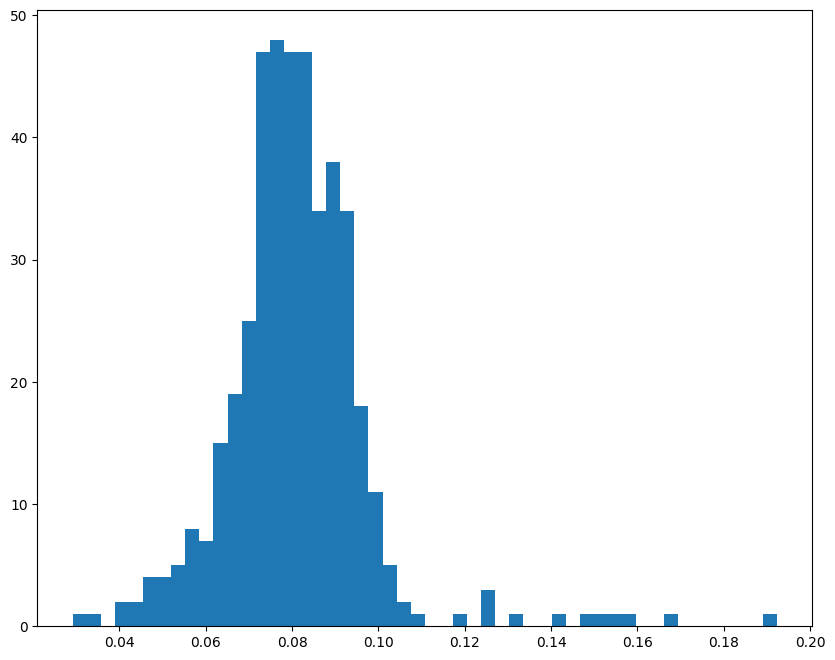

In [121]:
reconstructions_a=model.predict(anamaly_test_data)
train_loss_a=tf.keras.losses.mae(reconstructions_a,anamaly_test_data)
plt.hist(train_loss_a,bins=50)

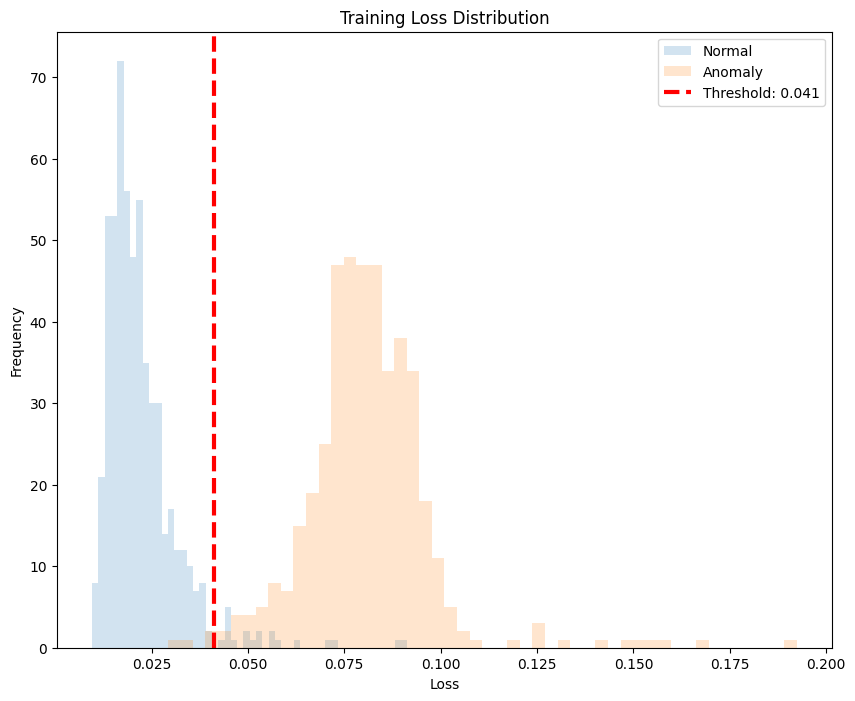

In [122]:
plt.hist(train_loss, bins=50, alpha=0.2, label="Normal")
plt.hist(train_loss_a, bins=50, alpha=0.2, label="Anomaly")

# Add a vertical line for the threshold
plt.axvline(thresold, color='r', linewidth=3, linestyle='dashed', label='Threshold: {:0.3f}'.format(thresold))

# Add legend and labels
plt.legend(loc="upper right")
plt.title("Training Loss Distribution")
plt.xlabel("Loss")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [123]:
np.mean(train_loss_a)

0.08100145389664967

In [124]:
np.std(train_loss_a)

0.0166669219692039

In [125]:
thresold_a=np.mean(train_loss_a)+2*np.std(train_loss_a)

In [126]:
thresold_a

0.11433529783505747

In [127]:
preds=tf.math.less(train_loss,thresold)

In [128]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=543>

In [129]:
preds.shape

TensorShape([563])

In [133]:
preds_a=tf.math.greater(train_loss_a,thresold)

In [134]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=434>

In [132]:
preds_a.shape

TensorShape([563])